Challenge context
One of the key indicators of the Natural Resources market is the Crude Oil production. Understanding the variation of the production per region helps in predicting the Oil price trends in these regions and for different qualities of the Crude.
These indicators can be very useful for SOCIETE GENERALE teams since they will help on:

Predicting the revenue generated by the Trade Finance business line.
Building prospection watch-list for the Natural Resources front-office and anticipating clients needs.
Adjusting the forecasts of the Crude Oil trade back-office's workload.
Challenge goals
The objective of this challenge is to predict the probability of increase of Crude Oil production per quarter per country based on several indicators collected during the previous year.

https://challengedata.ens.fr/en/challenge/25/predict_the_crude_oil_production_trend.html#

In [1]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data

## Loading

In [3]:
DATA_PATH = "../Data/"
train_data = pd.read_csv(
    DATA_PATH + "Train.csv", delimiter=";", header=0, index_col=0)
train_target = pd.read_csv(
    DATA_PATH +
    "challenge_output_data_training_file_predict_the_crude_oil_production_trend.csv",
    delimiter=";",
    header=0,
    index_col=0)
test_data = pd.read_csv(
    DATA_PATH + "Test.csv", delimiter=";", header=0, index_col=0)

In [4]:
print(train_data.shape)

(10159, 122)


In [5]:
train_data.head()

,month,country,1_diffClosing stocks(kmt),1_diffExports(kmt),1_diffImports(kmt),1_diffRefinery intake(kmt),1_diffWTI,1_diffSumClosing stocks(kmt),1_diffSumExports(kmt),1_diffSumImports(kmt),...,12_diffClosing stocks(kmt),12_diffExports(kmt),12_diffImports(kmt),12_diffRefinery intake(kmt),12_diffWTI,12_diffSumClosing stocks(kmt),12_diffSumExports(kmt),12_diffSumImports(kmt),12_diffSumProduction(kmt),12_diffSumRefinery intake(kmt)
ID,,,,,,,,,,,,,,,,,,,,,
ID00001,5,52,0.0000,237.0000,0.0000,33.0000,-5.62,10426.2462,12135.1024,20527.7805,...,0.0000,0.0000,0.0000,14.0000,2.92,673.8569,-13007.1520,-5932.5482,-17130.8333,-13151.4560
ID00002,12,69,28.0000,-34.0000,60.0000,7.0000,-5.95,195.2005,7500.1033,6335.0098,...,-43.0000,-129.0000,-67.0000,-16.0000,-5.62,3217.0304,-6563.6422,-3587.5152,-13053.6586,-13005.0503
ID00003,5,74,0.0000,0.0000,-29.1227,-85.5816,-5.62,10426.2462,12135.1024,20527.7805,...,0.0000,0.0000,-17.8667,-13.2214,2.92,673.8569,-13007.1520,-5932.5482,-17130.8333,-13151.4560
ID00004,11,34,175.3701,91.5209,0.0000,339.4347,7.66,-2247.4834,-6806.1222,-10986.0493,...,81.8304,-579.9462,0.0000,16.6891,-8.62,-2929.8903,1072.8473,504.0197,-4827.2299,3962.6288
ID00005,7,2,-550.0674,251.9568,0.0000,-49.5277,-12.07,-2652.6804,2165.7119,-4491.3056,...,-1127.1255,-512.5506,0.0000,-2.0243,7.20,2513.6243,-1732.4430,-4827.1576,-7242.5506,-13079.2251


## Exploration

In [6]:
# check NaNs
train_data[train_data.isnull().values].shape

(4497, 122)

## Preprocessing

In [43]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(train_data)
X = imp.transform(train_data)
y = train_target.values.ravel()

# Feature expansion

In [59]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X) 

In [57]:
transformer_log1p = FunctionTransformer(np.log1p)
X_log1p = transformer_log1p.transform(X)

transformer_sqrt = FunctionTransformer(np.sqrt)
X_sqrt = transformer_sqrt.transform(X)

transformer_arctan = FunctionTransformer(np.arctan)
X_arctan = transformer_arctan.transform(X)

C:\Users\Leonovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: divide by zero encountered in log1p
  **(kw_args if kw_args else {}))
C:\Users\Leonovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))
C:\Users\Leonovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in sqrt
  **(kw_args if kw_args else {}))


In [62]:
X_full = np.hstack((X_poly, X_log1p, X_sqrt, X_arctan))
imp.fit(X_full)
X_full = imp.transform(X_full)
X_full = scale(X_full)

C:\Users\Leonovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


# Machine learning

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42)

In [69]:
X_train.shape, y_train.shape

((8127, 7944), (8127,))

## Model selection

https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/

In [66]:
classifiers = [
    LinearRegression(),
    KernelRidge(),
    #SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

classifiers_names = [
    "Linear regression",
    "Kernel rigde",
    #"Support Vector regression",
    "Random Forest",
    "Gradient boosting"
]


# 4 folds to match my number of CPU cores
def test_classifiers(classifiers, names, data, target, cv=4):
    for i, classifier in enumerate(classifiers):
        scores = cross_val_score(
            classifier, data, target, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(names[i])
        print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(),
                                               scores.std() * 2))

In [70]:
# poly 2
test_classifiers(classifiers, classifiers_names, X_train, y_train)

Linear regression
Accuracy: 0.530 (+/- 0.025)
Kernel rigde
Accuracy: 0.592 (+/- 0.027)
Random Forest
Accuracy: 0.745 (+/- 0.009)
Gradient boosting
Accuracy: 0.783 (+/- 0.016)


In [67]:
# non poly
test_classifiers(classifiers, classifiers_names, X_train, y_train)

Linear regression
Accuracy: 0.703 (+/- 0.009)
Kernel rigde
Accuracy: 0.695 (+/- 0.008)
Random Forest
Accuracy: 0.744 (+/- 0.016)
Gradient boosting
Accuracy: 0.781 (+/- 0.016)


### TEST on ANN

In [21]:
from sklearn.neural_network import MLPRegressor

In [37]:
Multilayer_perceptron_estimator = MLPRegressor(hidden_layer_sizes=1000)
Multilayer_perceptron_estimator.fit(X_train[:], y_train[:])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [38]:
pred = Multilayer_perceptron_estimator.predict(X_test)
roc_auc_score(y_test, pred)

0.50232647629431293

## Model tuning 

### Gradient boosting forest

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [71]:
def modelfit(alg,
             dtrain,
             predictors,
             performCV=True,
             printFeatureImportance=True,
             cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, predictors)

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    #dtrain_predprob = alg.predict_proba(dtrain)[:, 1]

    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(
            alg, dtrain, predictors, cv=cv_folds, scoring='roc_auc')

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % roc_auc_score(predictors, dtrain_predictions))

    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" %
              (np.mean(cv_score), np.std(cv_score), np.min(cv_score),
               np.max(cv_score)))

    #Print Feature Importance:
    #if printFeatureImportance:
    #    feat_imp = pd.Series(alg.feature_importances_,
    #                         X_full.va).sort_values(ascending=False)
    #    feat_imp.plot(kind='bar', title='Feature Importances', figsize=(20, 5))
    #    plt.ylabel('Feature Importance Score')

In [78]:
# baseline score
modelfit(
    GradientBoostingRegressor(random_state=10),
    X_train,
    y_train)


Model Report
Accuracy : 0.8953
CV Score : Mean - 0.784092 | Std - 0.00555302 | Min - 0.7791596 | Max - 0.7947739


ValueError: Wrong number of items passed 7944, placement implies 122

In [208]:
# tune the number of trees
# usually more is better, but also more cumputationnaly expensive
param_test1 = {'n_estimators': range(50, 121, 10)}

gsearch1 = GridSearchCV(
    estimator=GradientBoostingRegressor(
        learning_rate=0.05,   # around 0.1
        min_samples_split=80, # we take ~1% of the number of row
        min_samples_leaf=50,
        max_depth=8,          # usually between 4 and 8
        max_features='sqrt',
        subsample=0.8,
        random_state=10),
    param_grid=param_test1,
    scoring='roc_auc',
    n_jobs=-1,
    iid=False,
    cv=5)

gsearch1.fit(X_train, y_train.values.ravel())
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 110}, 0.78980911402455756)

In [209]:
param_test2 = {
    'max_depth': range(5, 16, 2),
    'min_samples_split': range(40, 161, 20)
}

gsearch2 = GridSearchCV(
    estimator=GradientBoostingRegressor(
        learning_rate=0.05,
        n_estimators=110,
        max_features='sqrt',
        subsample=0.8,
        random_state=10),
    param_grid=param_test2,
    scoring='roc_auc',
    n_jobs=-1,
    iid=False,
    cv=5)

gsearch2.fit(X_train, y_train.values.ravel())
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 11, 'min_samples_split': 120}, 0.7872824348211247)

In [211]:
param_test3 = {
    'min_samples_split': range(40, 161, 20),
    'min_samples_leaf': range(30, 71, 10)
}
gsearch3 = GridSearchCV(
    estimator=GradientBoostingRegressor(
        learning_rate=0.05,
        n_estimators=110,
        max_depth=11,
        max_features='sqrt',
        subsample=0.8,
        random_state=10),
    param_grid=param_test3,
    scoring='roc_auc',
    n_jobs=-1,
    iid=False,
    cv=5)
gsearch3.fit(X_train, y_train.values.ravel())
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30, 'min_samples_split': 160}, 0.78778899426314319)


Model Report
CV Score : Mean - 0.7751702 | Std - 0.008256622 | Min - 0.7644445 | Max - 0.7891008


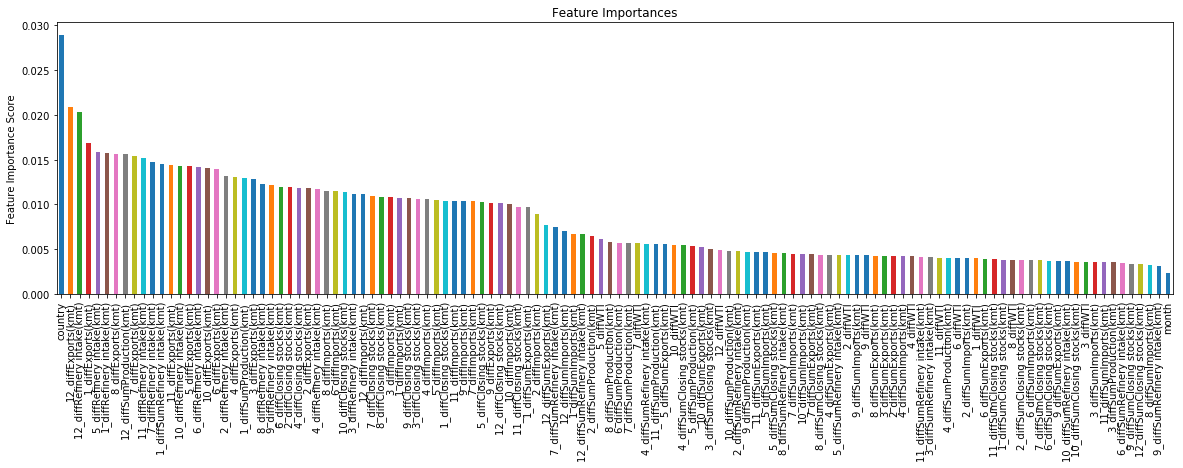

In [158]:
modelfit(
    GradientBoostingRegressor(
        learning_rate=0.05,
        n_estimators=80,
        max_depth=9,
        max_features='sqrt',
        subsample=0.8,
        random_state=10), X_train, y_train.values.ravel())

In [161]:
param_test4 = {'max_features': range(7, 20, 2)}

gsearch4 = GridSearchCV(
    estimator=GradientBoostingRegressor(
        learning_rate=0.1,
        n_estimators=60,
        max_depth=9,
        min_samples_leaf=400,
        subsample=0.8,
        random_state=10),
    param_grid=param_test4,
    scoring='roc_auc',
    n_jobs=-1,
    iid=False,
    cv=5)

gsearch4.fit(X_train, y_train.values.ravel())
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 15}, 0.77752514364710612)

## Validation

In [76]:
GBR = GradientBoostingRegressor(
    learning_rate=0.05,
    min_samples_split=80,
    min_samples_leaf=50,
    max_depth=8,
    max_features='sqrt',
    subsample=0.8,
    random_state=10)
GBR.fit(X_train, y_train)
prediction = GBR.predict(X_test)
val_score = roc_auc_score(y_test, prediction)
val_score

0.78487924022083622

# Generate submission

In [186]:
submission_estimator = GBR
submission_estimator.fit(X, y.values.ravel())
submission_prediction = submission_estimator.predict(test_data)

In [198]:
SUBMISSION_PATH = "../Submission/"
submission_name = 'submission%.3f' % val_score

with open(SUBMISSION_PATH + submission_name + '.txt', 'w') as the_file:
    the_file.write('no preprocessing\n')
    the_file.write(
        "GradientBoostingRegressor(learning_rate=0.05,min_samples_split=80,min_samples_leaf=50,max_depth=8,max_features=sqrt,subsample=0.8,random_state=10)"
    )

test_data['Target'] = submission_prediction
test_data['Target'].to_csv(
    SUBMISSION_PATH + submission_name + '.csv', sep=";", header=True)
test_data = test_data.drop('Target', axis=1)